In [2]:
%matplotlib inline
import os
import sys
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.patches as patches



import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms, datasets
from torchvision.datasets import VOCDetection
import cv2

import xml.etree.ElementTree as ET


In [3]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

voc_dataset = VOCDetection(root='./data', 
                           year='2012', 
                           image_set='train',
                           download=True, 
                        #    transform=transform
                           )

print(f"Number of images in the dataset: {len(voc_dataset)}")


Using downloaded and verified file: ./data\VOCtrainval_11-May-2012.tar
Extracting ./data\VOCtrainval_11-May-2012.tar to ./data
Number of images in the dataset: 5717


In [76]:
voc_dataset

Dataset VOCDetection
    Number of datapoints: 5717
    Root location: ./data

In [4]:
# torch images are [C, H, W]
image, annotation = voc_dataset[200]

# to visualize the image, we need to change the order of the channels to [H, W, C]
# image = image.permute(1, 2, 0).numpy()

In [5]:
image.size

(500, 375)

In [6]:
def visualize_image(image, annotations):
    # Create a matplotlib figure and axis
    fig, ax = plt.subplots(1)
    # Display the image
    ax.imshow(image)

    # Annotations is a dictionary with keys like 'annotation' and 'object'
    objects = annotations['annotation']['object']
    if type(objects) == dict:  # If there's only one object, it's a dictionary
        objects = [objects]
    
    for obj in objects:
        # Each object has a bounding box and a name
        bbox = obj['bndbox']
        label = obj['name']
        
        # Extract coordinates for the bounding box
        x_min, y_min = int(bbox['xmin']), int(bbox['ymin'])
        x_max, y_max = int(bbox['xmax']), int(bbox['ymax'])
        width, height = x_max - x_min, y_max - y_min
        
        # Create a rectangle patch for the bounding box
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the rectangle to the plot
        ax.add_patch(rect)
        
        # Add the label
        plt.text(x_min, y_min, label, color='white', fontsize=8, bbox=dict(facecolor='red', edgecolor='none', pad=2))

    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()


def parse_voc_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    annotations = []
    for obj in root.iter('object'):
        label = obj.find('name').text
        bbox_xml = obj.find('bndbox')
        bbox = {
            'xmin': int(bbox_xml.find('xmin').text),
            'ymin': int(bbox_xml.find('ymin').text),
            'xmax': int(bbox_xml.find('xmax').text),
            'ymax': int(bbox_xml.find('ymax').text)
        }
        annotations.append((label, bbox))
    
    return annotations

def parse_all_annotations(dataset):
    all_annotations = []
    
    for idx in range(len(dataset)):
        # Retrieve image and target from the dataset
        _, target = dataset[idx]
        image_id = target['annotation']['filename']

        # Construct the path to the XML annotation file
        xml_file = os.path.join(dataset.root, 'VOCdevkit', 'VOC2012', 'Annotations', image_id.replace('.jpg', '.xml'))

        # Parse the XML file
        annotations = parse_voc_annotation(xml_file)
        all_annotations.append((image_id, annotations))
    
    return all_annotations

In [7]:
annotations = parse_all_annotations(voc_dataset)

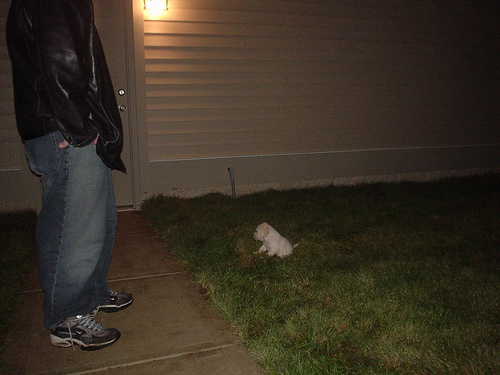

In [11]:
image

In [10]:
annotations

[('2008_000008.jpg',
  [('horse', {'xmin': 53, 'ymin': 87, 'xmax': 471, 'ymax': 420}),
   ('person', {'xmin': 158, 'ymin': 44, 'xmax': 289, 'ymax': 167})]),
 ('2008_000015.jpg',
  [('bottle', {'xmin': 270, 'ymin': 1, 'xmax': 378, 'ymax': 176}),
   ('bottle', {'xmin': 57, 'ymin': 1, 'xmax': 164, 'ymax': 150})]),
 ('2008_000019.jpg',
  [('dog', {'xmin': 139, 'ymin': 2, 'xmax': 372, 'ymax': 197}),
   ('dog', {'xmin': 165, 'ymin': 66, 'xmax': 318, 'ymax': 236}),
   ('dog', {'xmin': 361, 'ymin': 1, 'xmax': 480, 'ymax': 112})]),
 ('2008_000023.jpg',
  [('tvmonitor', {'xmin': 6, 'ymin': 1, 'xmax': 314, 'ymax': 262}),
   ('bottle', {'xmin': 40, 'ymin': 97, 'xmax': 121, 'ymax': 411}),
   ('person', {'xmin': 137, 'ymin': 36, 'xmax': 169, 'ymax': 109}),
   ('person', {'xmin': 180, 'ymin': 36, 'xmax': 216, 'ymax': 104}),
   ('person', {'xmin': 96, 'ymin': 39, 'xmax': 123, 'ymax': 103})]),
 ('2008_000028.jpg',
  [('car', {'xmin': 158, 'ymin': 199, 'xmax': 231, 'ymax': 240}),
   ('car', {'xmin': 47,

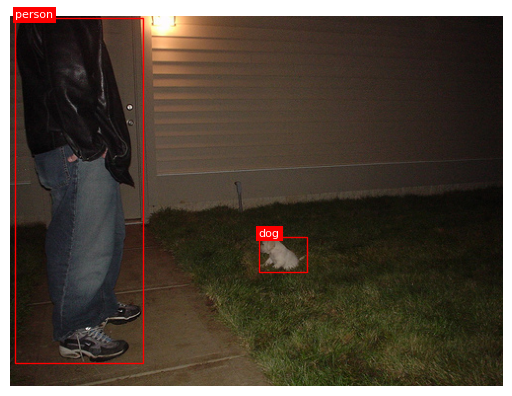

In [9]:
visualize_image(image, annotation)